In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/AirQuality.csv'
ar = pd.read_csv(file_path, delimiter = ';')

In [ ]:
# getting the numerical estimates of all the numerical column
ar.describe()

In [ ]:
#Dropping CO(GT) and Unnamed columns
ar.drop(['CO(GT)','Unnamed: 15','Unnamed: 16'],axis = 1,inplace = True)

In [ ]:
#Formatting some object columns from strings to floats

ar.replace(to_replace=',',value='.',regex=True,inplace=True)

for i in 'C6H6(GT) T RH AH'.split():
    ar[i] = pd.to_numeric(ar[i],errors='coerce')

In [ ]:
#Replacing null data from -200 to NaN for posterior treatment

ar.replace(to_replace=-200,value=np.nan,inplace=True)

ar.info()

In [ ]:
#Formatting Date and Time to datetime type

ar['Date'] = pd.to_datetime(ar['Date'],dayfirst=True)

ar['Time'] = pd.to_datetime(ar['Time'],format= '%H.%M.%S' ).dt.time

ar.head()

In [ ]:
#Removing NMHC(GT) sensor due to amount of null values

ar.drop('NMHC(GT)', axis=1, inplace=True)

ar.info()

In [ ]:
ar.drop(['CO(GT)']  ,axis=1, inplace=True, errors = 'ignore')
ar.drop(['NOx(GT)'] ,axis=1, inplace=True, errors = 'ignore')
ar.drop(['C6H6(GT)'],axis=1, inplace=True, errors = 'ignore')
ar.drop(['NO2(GT)'] ,axis=1, inplace=True, errors = 'ignore')
ar.head()

In [ ]:
ar = ar.dropna()
percent_NaN = []
columns = ar.columns
for col in columns:
    pNaN =  (ar[col].isna().sum()/ar.shape[0]) * 100 #sum NaN instances in each column. Divide by total rows
    percent_NaN.append(pNaN)
nan_percent_df = pd.DataFrame(percent_NaN,
                              index=columns,
                              columns=['%_NaN_in_Column']).sort_values('%_NaN_in_Column',ascending = False)
nan_percent_df

In [ ]:
ar

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv(file_path ,sep=";", decimal=",",header=0)


In [ ]:
df.head()
df.drop(columns=['Unnamed: 15', 'Unnamed: 16'],inplace=True)
df.dropna(inplace=True)
df.replace(to_replace=-200,value=np.nan,inplace=True)

df.drop(columns=['NMHC(GT)'],inplace=True)
df.isna().sum()

df.drop(columns=['C6H6(GT)'],inplace=True)
df.drop(columns=['NOx(GT)'],inplace=True)
df.drop(columns=['NO2(GT)'],inplace=True)
df.drop(columns=['CO(GT)'],inplace=True)

In [ ]:
df

In [ ]:
col = ['PT08.S1(CO)','PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)','PT08.S5(O3)', 'T', 'RH', 'AH']
time_frame = df[['Date', 'Time']]
df = df[col]
df[col].dtypes
df.describe()


In [ ]:
for i in col:
    df[i] = df[i].fillna(df[i].mean())
plt.figure(figsize=(5,5))
sns.boxplot(data=df)
plt.xticks(rotation='vertical')
plt.show()


In [ ]:
# getting the quartile one and quartile 3 values of each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
# finally calculating the interquartile range IQR
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

In [ ]:
mask = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))


In [ ]:
# now replacing all the outliers using the median of that particular column
for i in mask.columns:
    df[i].astype('float')
    temp = df[i].median()
    df.loc[mask[i], i] = temp

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df_combined = pd.concat([time_frame, df], axis=1)

In [ ]:
df_combined['DateTime'] = pd.to_datetime(df_combined['Date'] + ' ' + df_combined['Time'], format='%d/%m/%Y %H.%M.%S')


In [ ]:
def get_season(date):
    year = date.year
    seasons = {
        'spring': (pd.Timestamp(year=year, month=3, day=21), pd.Timestamp(year=year, month=6, day=20)),
        'summer': (pd.Timestamp(year=year, month=6, day=21), pd.Timestamp(year=year, month=9, day=22)),
        'fall': (pd.Timestamp(year=year, month=9, day=23), pd.Timestamp(year=year, month=12, day=20)),
        'winter': (pd.Timestamp(year=year, month=12, day=21), pd.Timestamp(year=year, month=3, day=20)),
    }
    for season, (start, end) in seasons.items():
        if start <= date <= end:
            return season
    # For the end of the year wrapping around
    return 'winter'

In [ ]:
df_combined

In [ ]:
# Apply the function to create a 'Season' column
df_combined['Season'] = df_combined['DateTime'].apply(get_season)

# Drop the original 'Date' and 'Time' columns
df_combined = df_combined.drop(columns=['Date', 'Time'])

# Split the data into separate data frames for each season
seasons = df_combined['Season'].unique()
seasonal_dfs = {season: df_combined[df_combined['Season'] == season].reset_index(drop=True) for season in seasons}



In [ ]:
## do pca and clustering here

In [ ]:
df_combined

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns

In [ ]:
sns.jointplot(df_combined, x='PT08.S1(CO)', y='PT08.S2(NMHC)', hue="Season")#, kind="kde")

In [ ]:
sns.jointplot(df_combined, x='PT08.S1(CO)', y='PT08.S3(NOx)', hue="Season")#, kind="kde")

In [ ]:
sns.jointplot(df_combined, x='PT08.S1(CO)', y='PT08.S4(NO2)', hue="Season")#, kind="kde")

In [ ]:
PT08.S4(NO2)

In [ ]:
sns.jointplot(df_combined, x='T', y='PT08.S1(CO)', hue="Season")

In [ ]:
# Select features for PCA and correlation
features = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']

# Perform PCA for Spring
spring_data = seasonal_dfs['spring'][features]
pca = PCA(n_components=2)
pca_result = pca.fit_transform(spring_data)

# Plot PCA result
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
plt.title('PCA of Spring Season Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Correlation matrix for Spring
corr_matrix = spring_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Spring Season Data')
plt.show()


In [ ]:
# Perform PCA for Spring
spring_data = seasonal_dfs['summer'][features]
pca = PCA(n_components=2)
pca_result = pca.fit_transform(spring_data)

# Plot PCA result
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
plt.title('PCA of Summer Season Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Correlation matrix for Spring
corr_matrix = spring_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Summer Season Data')
plt.show()


In [ ]:
# Perform PCA for Spring
spring_data = seasonal_dfs['fall'][features]
pca = PCA(n_components=2)
pca_result = pca.fit_transform(spring_data)

# Plot PCA result
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
plt.title('PCA of Fall Season Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Correlation matrix for Spring
corr_matrix = spring_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Fall Season Data')
plt.show()


In [ ]:
# Perform PCA for Spring
spring_data = seasonal_dfs['winter'][features]
pca = PCA(n_components=2)
pca_result = pca.fit_transform(spring_data)

# Plot PCA result
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
plt.title('PCA of Winter Season Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Correlation matrix for Spring
corr_matrix = spring_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Winter Season Data')
plt.show()


In [ ]:
# Elbow method to determine the optimal number of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_result)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# Based on the elbow plot, choose the optimal number of clusters, e.g., k = 3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
spring_data['Cluster'] = kmeans.fit_predict(pca_result)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=spring_data['Cluster'], cmap='viridis', alpha=0.7)
plt.title('PCA Clustering of Spring Season Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

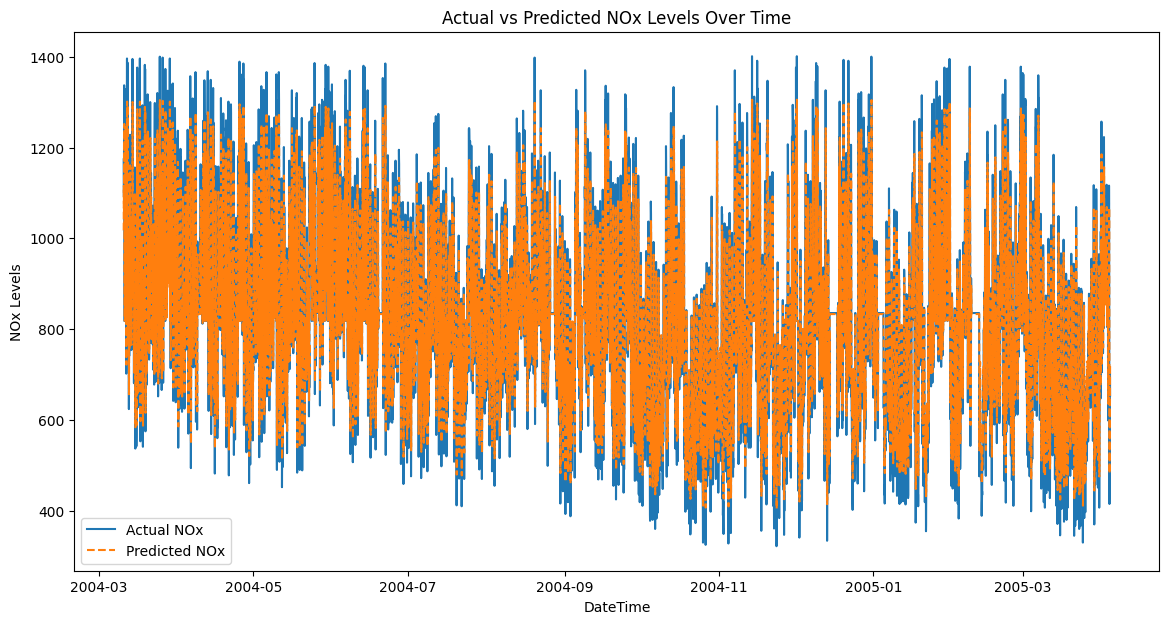

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the data
file_path = 'clean.csv'
data = pd.read_csv(file_path)

# Ensure the DateTime column is in datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'])

# Sort the data by DateTime
data.sort_values(by='DateTime', inplace=True)

# Set the DateTime column as the index
data.set_index('DateTime', inplace=True)

# Create a new column for the NOx values shifted by one timestep
data['NOx_lagged'] = data['PT08.S3(NOx)'].shift(1)

# Drop the first row with NaN value in NOx_lagged
data.dropna(inplace=True)

# Split the data into training and testing sets
X = data['NOx_lagged'].values.reshape(-1, 1)
y = data['PT08.S3(NOx)'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Create a DataFrame for the results
results = pd.DataFrame({
    'DateTime': data.index,
    'Actual_NOx': y,
    'Predicted_NOx': np.concatenate([y_pred_train, y_pred_test])
})

# Plot the actual data and predictions
plt.figure(figsize=(14, 7))
plt.plot(results['DateTime'], results['Actual_NOx'], label='Actual NOx')
plt.plot(results['DateTime'], results['Predicted_NOx'], label='Predicted NOx', linestyle='--')
plt.xlabel('DateTime')
plt.ylabel('NOx Levels')
plt.title('Actual vs Predicted NOx Levels Over Time')
plt.legend()
plt.show()


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the data
file_path = '/mnt/data/clean.csv'
data = pd.read_csv(file_path)

# Ensure the DateTime column is in datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'])

# Sort the data by DateTime
data.sort_values(by='DateTime', inplace=True)

# Set the DateTime column as the index
data.set_index('DateTime', inplace=True)

# Create a new column for the NOx values shifted by one timestep
data['NOx_lagged'] = data['PT08.S3(NOx)'].shift(1)

# Drop the first row with NaN value in NOx_lagged
data.dropna(inplace=True)

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['PT08.S3(NOx)', 'NOx_lagged']])

# Split the data into training and testing sets
train_size = int(len(data_scaled) * 0.8)
train, test = data_scaled[:train_size], data_scaled[train_size:]

X_train, y_train = train[:, 1].reshape(-1, 1, 1), train[:, 0]
X_test, y_test = test[:, 1].reshape(-1, 1, 1), test[:, 0]

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, verbose=1)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Inverse transform the predictions and actual values
y_pred_test_inv = scaler.inverse_transform(np.concatenate((y_pred_test, test[:, 1].reshape(-1, 1)), axis=1))[:, 0]
y_test_inv = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), test[:, 1].reshape(-1, 1)), axis=1))[:, 0]

# Plot the actual data and predictions
plt.figure(figsize=(14, 7))
plt.plot(data.index[train_size:], y_test_inv, label='Actual NOx')
plt.plot(data.index[train_size:], y_pred_test_inv, label='Predicted NOx (LSTM)', linestyle='--')
plt.xlabel('DateTime')
plt.ylabel('NOx Levels')
plt.title('Actual vs Predicted NOx Levels Over Time')
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'distutils'

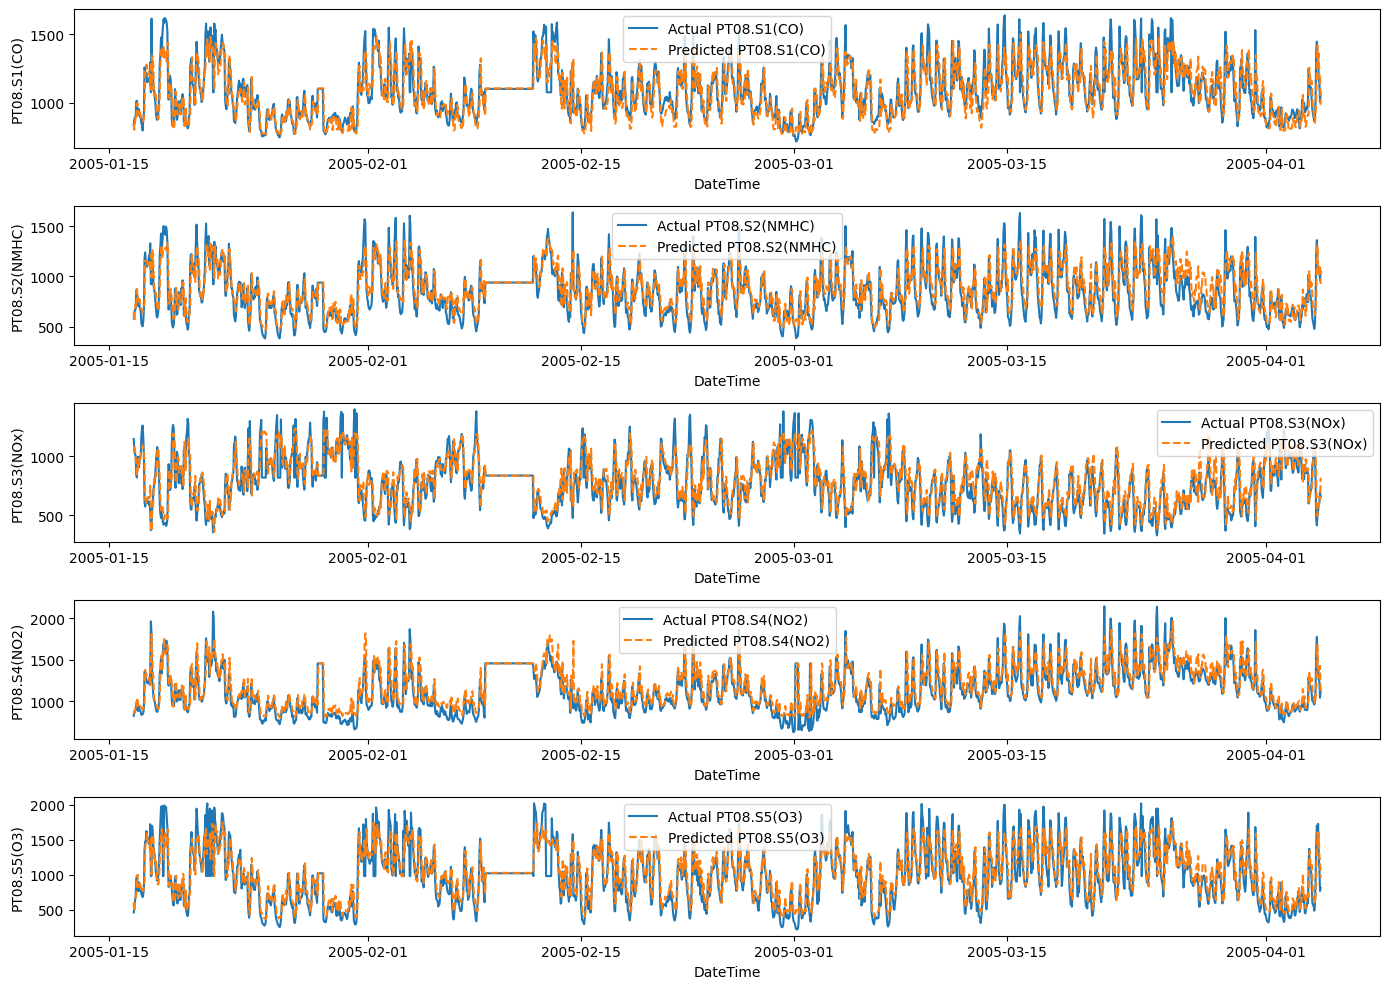

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np

# Load the data
file_path = '/mnt/data/clean.csv'
data = pd.read_csv(file_path)

# Ensure the DateTime column is in datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'])

# Sort the data by DateTime
data.sort_values(by='DateTime', inplace=True)

# Set the DateTime column as the index
data.set_index('DateTime', inplace=True)

# Create lagged features for each pollutant
pollutants = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)']
for pollutant in pollutants:
    data[f'{pollutant}_lagged'] = data[pollutant].shift(1)

# Drop rows with NaN values
data.dropna(inplace=True)

# Define input features (lagged pollutants) and output targets (current pollutants)
X = data[[f'{pollutant}_lagged' for pollutant in pollutants]]
y = data[pollutants]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train a Random Forest model for multi-output regression
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Plot the actual data and predictions for each pollutant
plt.figure(figsize=(14, 10))

for i, pollutant in enumerate(pollutants):
    plt.subplot(len(pollutants), 1, i + 1)
    plt.plot(data.index[len(y_train):], y_test[pollutant], label='Actual ' + pollutant)
    plt.plot(data.index[len(y_train):], y_pred_test[:, i], label='Predicted ' + pollutant, linestyle='--')
    plt.xlabel('DateTime')
    plt.ylabel(pollutant)
    plt.legend()

plt.tight_layout()
plt.show()


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np

# Load the data
file_path = 'clean.csv'
data = pd.read_csv(file_path)

# Ensure the DateTime column is in datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'])

# Sort the data by DateTime
data.sort_values(by='DateTime', inplace=True)

# Set the DateTime column as the index
data.set_index('DateTime', inplace=True)

# Create lagged features for each pollutant
pollutants = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)']
for pollutant in pollutants:
    data[f'{pollutant}_lagged'] = data[pollutant].shift(1)

# Drop rows with NaN values
data.dropna(inplace=True)

# Define input features (lagged pollutants) and output targets (current pollutants)
X = data[[f'{pollutant}_lagged' for pollutant in pollutants]]
y = data[pollutants]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train a Random Forest model for multi-output regression
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Create a DataFrame for the results
results = pd.DataFrame({
    'DateTime': data.index[len(y_train):],
})

# Add actual and predicted values for each pollutant to the results DataFrame
for i, pollutant in enumerate(pollutants):
    results[f'Actual_{pollutant}'] = y_test[pollutant].values
    results[f'Predicted_{pollutant}'] = y_pred_test[:, i]

# Save the results to a CSV file
output_file_path = 'predicted_pollutants.csv'
results.to_csv(output_file_path, index=False)

# Display the first few rows of the results DataFrame
print(results.head())


             DateTime  Actual_PT08.S1(CO)  Predicted_PT08.S1(CO)  \
0 2005-01-16 15:00:00               833.0                 843.97   
1 2005-01-16 16:00:00               877.0                 801.43   
2 2005-01-16 17:00:00               892.0                 851.85   
3 2005-01-16 18:00:00               899.0                 885.07   
4 2005-01-16 19:00:00              1008.0                 876.61   

   Actual_PT08.S2(NMHC)  Predicted_PT08.S2(NMHC)  Actual_PT08.S3(NOx)  \
0                 584.0                   651.75               1144.0   
1                 642.0                   556.05               1037.0   
2                 668.0                   645.96               1017.0   
3                 674.0                   714.46               1002.0   
4                 861.0                   684.93                839.0   

   Predicted_PT08.S3(NOx)  Actual_PT08.S4(NO2)  Predicted_PT08.S4(NO2)  \
0                 1064.91                821.0                  878.59   
1   